## **Plant Disease Classfication**

In [1]:
# -- colab snippet for mounting -- 
# from google.colab import drive
# drive.mount('/content/drive')

In [13]:
! ls

Alzheimer_s Dataset               evaluation.py
Data-Archive                      plant-data
Git                               plant-disease-classifier-tl.ipynb
__init__.py                       tl-model-stats
__pycache__                       yield_gen.py


In [14]:
# -- path-colab -- 
# path = 'drive/MyDrive/'
# archive = 'drive/MyDrive/Plant-Diseases.zip'
# -- path-local -- 
archive = './Plant-Diseases.zip'

In [15]:
# Extracting Images 
import zipfile
zipobj = zipfile.ZipFile(file=archive)

FileNotFoundError: [Errno 2] No such file or directory: './Plant-Diseases.zip'

In [16]:
import os 
if os.path.exists('./plant-data/'):
    print('Data Folder already exists')
else:
    print(os.mkdir('./plant-data/'))
    print('Extracting..')
    zipobj.extractall('./plant-data/')
print('Done')

# -- colab version -- 

# if os.path.exists(os.path.join(path,'plant-data')):
#     print('Data Folder already exists')
# else:
#     print(os.mkdir(os.path.join(path,'plant-data')))
#     print('Extracting..')
#     zipobj.extractall('./plant-data/')
# print('Done')


Data Folder already exists
Done


In [17]:
! ls plant-data

Test       Train      Validation


In [18]:
train_dir = './plant-data/Train/Train'
test_dir = './plant-data/Test/Test'
valid_dir = './plant-data/Validation/Validation'

# colab 
# train_dir = os.path.join(path, './plant-data/Train/Train' )
# test_dir = os.path.join(path, './plant-data/Test/Test')
# valid_dir = os.path.join(path, './plant-data/Validation/Validation')

In [19]:
# libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('classic')

In [20]:
# classes 
dirs = os.listdir('./plant-data/Train/Train')
dirs

['Powdery', '.DS_Store', 'Healthy', 'Rust']

Avoid Executing the following in colab 

In [21]:
print(f"Number of Instances, Powdery {os.listdir('./plant-data/Train/Train/Powdery/').__len__()}")
print(f"Number of Instances, Healthy {os.listdir('./plant-data/Train/Train/Healthy/').__len__()}")
print(f"Number of Instances, Rust {os.listdir('./plant-data/Train/Train/Rust/').__len__()}")

Number of Instances, Powdery 430
Number of Instances, Healthy 458
Number of Instances, Rust 434


In [32]:
r_index = np.random.randint(0,430,1)[0]
powdery = os.listdir('./plant-data/Train/Train/Powdery/')[r_index]
healthy = os.listdir('./plant-data/Train/Train/Healthy/')[r_index]
rust = os.listdir('./plant-data/Train/Train/Rust/')[r_index]

powdery = os.path.join('./plant-data/Train/Train/Powdery/', powdery)
healthy = os.path.join('./plant-data/Train/Train/Healthy/',healthy)
rust = os.path.join('./plant-data/Train/Train/Rust/', rust)


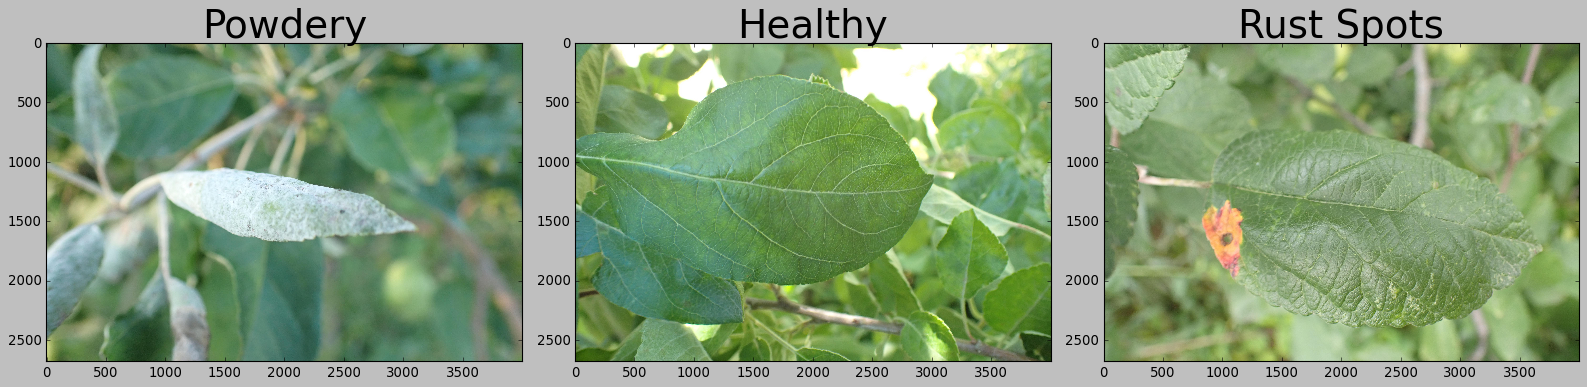

In [33]:
# random preview 
from PIL import Image 
img_pow = Image.open(powdery)
img_healthy = Image.open(healthy)
img_rust = Image.open(rust)
fig, axes = plt.subplots(1,3, figsize=(20,10))
axes[0].imshow(np.array(img_pow),label="powdery")
axes[0].set_title('Powdery', size=35)
axes[1].imshow(np.array(img_healthy),label="healthy")
axes[1].set_title('Healthy', size=35)
axes[2].imshow(np.array(img_rust),label="rusty")
axes[2].set_title('Rust Spots', size=35)
fig.tight_layout()


In [12]:
from matplotlib.image import imread

In [13]:
classes = ['Powdery', 'Healthy', 'Rust']

In [14]:
def dim_check(path, class_name,dist_type):
    
    
    dim1 = []
    dim2 = []
    print(class_name.upper())
    dictionary = {}
    for image_filename in os.listdir(path + '/' + class_name):
        
            img = imread(path + '/' + class_name + '/' + image_filename)
            d1,d2,colors = img.shape
            dim1.append(d1)
            dim2.append(d2)
        
            
    dictionary[class_name+'-'+dist_type] = (dim1, dim2)
    
    return dictionary
    
                                            

In [15]:
powdery_train = dim_check(train_dir, 'Powdery', 'Train')

POWDERY


/Users/rohan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


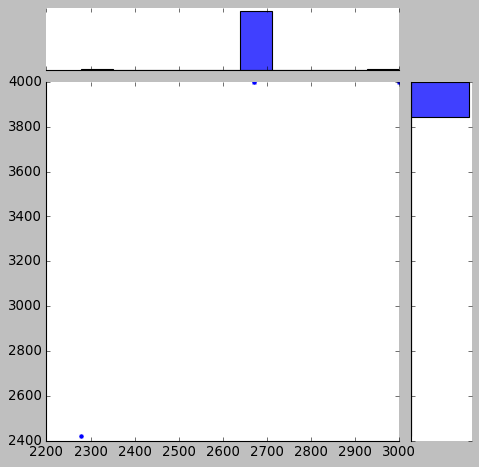

In [16]:
sns.jointplot(powdery_train['Powdery-Train'][0], powdery_train['Powdery-Train'][1])

Dimensions are non-uniform and extraneously large 
#### Things to-do 
*  scale down
*  create two separate generators 
    * with Augmentations (  zoom, width-shift, height-shift  ) + Normalisation and Image size
    * without Augmentations ( Normalisation and Image size )

In [18]:
image_shape = (256,256,3)

### Train and Validation Sets are with unequal spits 

In [22]:
# test_dir is manually merged with validation data to form 210 samples 
# (60 Validation + 150 Test)

In [97]:
# custom function to make test and validation splits with equal number of samples 
sample_paths = image_gen_with_aug.flow_from_directory(test_dir).filepaths

Found 210 images belonging to 3 classes.


In [75]:
powdery = sample_paths[70:140]
healthy = sample_paths[:70]
rust = sample_paths[140:]

In [70]:
def rename(classlist,path):
    for i,file in enumerate(classlist,1):
        os.rename(file, f"{path}{i}.jpg")
    

In [73]:
rename(healthy, './plant-data/Test/Test/Healthy/')

In [85]:
# Test 
# import shutil
# shutil.move('./plant-data/Test/Test/Healthy/1.jpg', './')

'./1.jpg'

In [108]:
def create_dist(classlist,name):
    classes = {"Healthy":"./plant-data/Validation/Validation/Healthy/",
               "Powdery": "./plant-data/Validation/Validation/Powdery/",
               "Rust" : "./plant-data/Validation/Validation/Rust/",
              }
    if name == "Powdery":
        print(name.upper())
        for path in np.unique(np.array(random.sample(classlist, 35))):
            shutil.move(path, classes[name])
    elif name == "Rust":
        print(name.upper())
        for path in np.unique(np.array(random.sample(classlist, 35))):
            shutil.move(path, classes[name])
    elif name == "Healthy":
        print(name.upper())
        for path in np.unique(np.array(random.sample(classlist, 35))):
            shutil.move(path, classes[name])
     
    else:
        print("Invalid Name")


In [106]:
# powdery
# create_dist(powdery, "Powdery")

POWDERY


In [109]:
# Rust
create_dist(rust,"Rust")

RUST


In [110]:
# Healthy 
create_dist(healthy, "Healthy")

HEALTHY


--- Validation Data, Set --- 

### Generators 

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [111]:
# help(ImageDataGenerator)

#### Flow from Directory
In order to use .flow_from_directory, you must organize the images in sub-directories. This is an absolute requirement, otherwise the method won't work. The directories should only contain images of one class, so one folder per class of images.

Structure Needed:

Image Data Folder
* Class 1
       0.jpg
       1.jpg
       ...
* Class 2
       0.jpg
       1.jpg
       ...
       ...
* Class n

In [115]:
# paths

train_dir = './plant-data/Train/Train'
test_dir = './plant-data/Test/Test'
valid_dir = './plant-data/Validation/Validation'

# colab 
# train_dir = os.path.join(path, './plant-data/Train/Train' )
# test_dir = os.path.join(path, './plant-data/Test/Test')
# valid_dir = os.path.join(path, './plant-data/Validation/Validation')



In [116]:
image_gen_with_aug = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               zoom_range=0.1, # Zoom in by 10% max
                              )

image_gen_without_aug = ImageDataGenerator(rescale=1/255) # Rescale the image by normalzing it.
                              
                      


### DataGenerator With Augmentations

In [117]:
# check
image_gen_with_aug.flow_from_directory(test_dir)

Found 105 images belonging to 3 classes.


In [118]:
a_train = image_gen_with_aug.flow_from_directory(train_dir,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               class_mode='categorical')

Found 1322 images belonging to 3 classes.


In [119]:
a_valid = image_gen_with_aug.flow_from_directory(valid_dir,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               class_mode='categorical')

Found 105 images belonging to 3 classes.


In [120]:
a_test = image_gen_with_aug.flow_from_directory(test_dir,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               class_mode='categorical')

Found 105 images belonging to 3 classes.


In [121]:
# preview after Augmentation
testx, testy = next(a_test)

In [122]:
class_names = a_test.class_indices

In [123]:
testy[0].argmax()

1

In [124]:
len(testx)

32

In [9]:
def plot_image(testx,testy,index):
    plt.imshow(testx[index])
    plt.title(list(class_names.keys())[testy[index].argmax()])

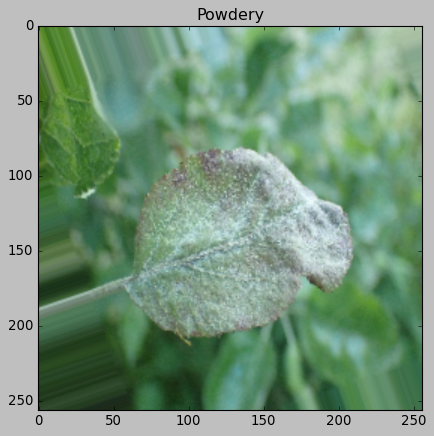

In [126]:
plot_image(testx, testy, 10)

### DataGenerators with Augmentations

In [127]:
wa_train = image_gen_without_aug.flow_from_directory(train_dir,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               class_mode='categorical')

Found 1322 images belonging to 3 classes.


In [128]:
wa_valid = image_gen_without_aug.flow_from_directory(valid_dir,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               class_mode='categorical')

Found 105 images belonging to 3 classes.


In [129]:
wa_test = image_gen_without_aug.flow_from_directory(test_dir,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               class_mode='categorical')

Found 105 images belonging to 3 classes.


In [130]:
testxw, testyw = next(wa_test)

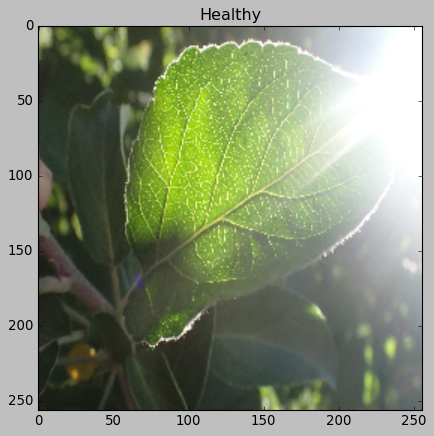

In [131]:
plot_image(testxw,testyw,31)

### Yield Generators for further usage 

In [1]:
from yield_gen import *

In [2]:
t, te, va = set_paths('local')

Local Paths Returned


In [3]:
t, te, va = generator('with-aug', 'local')

Local Paths Returned
Found 1322 images belonging to 3 classes.
Found 105 images belonging to 3 classes.
Found 105 images belonging to 3 classes.


In [2]:
docs()



    * functions
        - generator() : arguments gen_type = ( with-aug | with-augmentation ) & host = ( local | colab )

    * usage 
    
        from yield_gen import * 
        train, valid, test = generator(gen_type="with-aug", host="colab") # returns a tf.generator object with data

    * requirements
    
        - local data directory structure
            ./plant-data
                /Train
                    /Train
                        ..samples
                /Test
                    /Test
                        ..samples 
                /Validation
                    /Validation
                        ..samples
        
        - Colab data directory structure 
            ./drive
                ./MyDrive
                    /plant-data
                        /Train
                            /Train
                                ..samples
                        /Test
                            /Test
                                ..samples 
             

In [4]:
xtest, ytest = next(t)

In [6]:
class_names = t.class_indices

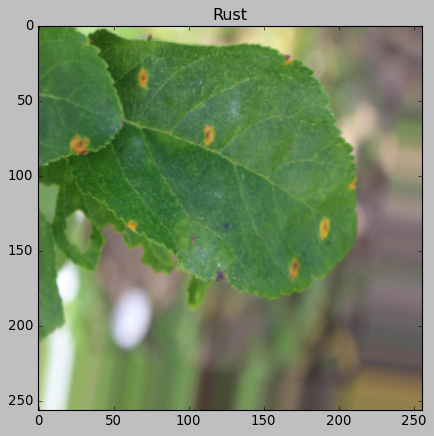

In [10]:
plot_image(xtest,ytest,31)